In [263]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
from difflib import SequenceMatcher
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
import utils
import experiments

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [264]:
basedir = "urdu-english"
translation_csvs = [f for f in os.listdir(basedir) if f[0] == "B"]
gold_csvs = [f for f in os.listdir(basedir) if f[0] == "m"]
# edit_csvs = [f for f in os.listdir(basedir) if f[0] == "e"]

In [265]:
pd.set_option('display.max_columns', 800)

In [266]:
def eat_csv(csvfile):
    df = pd.read_csv(csvfile, sep=",", error_bad_lines=False)
    item = []
    label = []
    worker = []
    hit = []
    doc = []
    seg = []
    itemID = []
    status = []
    for index, row in df.iterrows():
        workerID = row["WorkerId"]
        hitID = row["HITId"]
        docID = row["Input.document"]
        asval = row["AssignmentStatus"]
        for i in range(1, 21):
            try:
                if asval != "aRejected":
                    colitem = row["Input.seg" + str(i)]
                    collabel = row["Answer.translation" + str(i)]
                    item.append(colitem)
                    label.append(collabel)
                    worker.append(workerID)
                    hit.append(hitID)
                    doc.append(docID)
                    seg.append(i)
                    itemID.append(str(docID) + "_" + str(i))
                    status.append(asval)
            except:
                pass
    return pd.DataFrame({"item":item, "itemID":itemID, "label":label, "worker":worker, "doc":doc, "seg":seg, "status":status, "hit":hit})

In [267]:
def eat_gold_csv(csvfile):
    tree = ET.parse(csvfile)
    root = tree.getroot()
    itemID = []
    goldtext = []
    for doc in root.iter("doc"):
        docId = doc.get("docid")
        for seg in doc.iter("seg"):
            segId = seg.get("id")
            text = seg.text
            itemID.append(str(docId) + "_" + str(segId))
            goldtext.append(text)
    return pd.DataFrame({"itemID":itemID, "goldtext":goldtext})

In [268]:
# def eatgold(goldcsv):
#     return pd.read_csv(goldcsv, sep=",", error_bad_lines=False)
# gold = pd.concat([eatgold(basedir + "/" + csv) for csv in edit_csvs], sort=False)
# gold[gold["AssignmentId"]=="5YSZ0CCB9JRZQ2X9WSAZ"]

In [269]:
urdu_df = pd.concat([eat_csv(basedir + "/" + csv) for csv in translation_csvs])

In [270]:
urdu_df = urdu_df.sort_values(["doc", "seg", "itemID"])
urdu_df#[urdu_df.duplicated('doc')]

,item,itemID,label,worker,doc,seg,status,hit
56,فرانس کی تجویز کی حمایت,BBC_URD_20090102.0020_1,France has supported the proposal.,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,1,Approved,5YSZ0CCB9JRZQ2X9WSAZ
57,کمیٹی کا اجلاس جمعہ کے روز پارلیمنٹ ہاؤس میں ک...,BBC_URD_20090102.0020_2,"The Chairman of the Committee of the Summit, ...",A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,2,Approved,5YSZ0CCB9JRZQ2X9WSAZ
58,اجلاس کے بعد میڈیا کے نمائندوں سے گفتگو کرتے ہ...,BBC_URD_20090102.0020_3,"After the meeting, Mushahid Hussain Syed said ...",A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,3,Approved,5YSZ0CCB9JRZQ2X9WSAZ
59,انہوں نے اسرائیل کی طرف سے فسلطینیوں پر حملے ک...,BBC_URD_20090102.0020_4,He said that the Israeli attack is a crime on ...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,4,Approved,5YSZ0CCB9JRZQ2X9WSAZ
60,مشاہد حسین نے دنیا کے ممالک کے دوہرے معیار کو ...,BBC_URD_20090102.0020_5,Mushahid Hussain while criticizing the world t...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,5,Approved,5YSZ0CCB9JRZQ2X9WSAZ
61,خارجہ امور کے بارے میں سینیٹ کی قائمہ کمیٹی کے...,BBC_URD_20090102.0020_6,The foreign affairs Minister in the Senate Sta...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,6,Approved,5YSZ0CCB9JRZQ2X9WSAZ
62,انہوں نے کہا کہ کمیٹی نے اس اُمید کا اظہار کیا...,BBC_URD_20090102.0020_7,He said that the Committee expressed hope that...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,7,Approved,5YSZ0CCB9JRZQ2X9WSAZ
63,مشاہد حسین سید نے کہا کہ مسلم اُمہ اور مغرب کے...,BBC_URD_20090102.0020_8,Mushahid Hussain Syed said that Muslims and th...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,8,Approved,5YSZ0CCB9JRZQ2X9WSAZ
64,خارجہ امور کے وزیر مملکت ملک عماد خان نے کمیٹی...,BBC_URD_20090102.0020_9,"Imaduddin Khan, the Minister of External Affai...",A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,9,Approved,5YSZ0CCB9JRZQ2X9WSAZ
65,یہ ہنگامی اجلاس اسرائیل کی طرف سے فسلطین پر ہو...,BBC_URD_20090102.0020_10,The emergency meeting by Israel as the result ...,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,10,Approved,5YSZ0CCB9JRZQ2X9WSAZ


In [271]:
urdu_df[["item","label","itemID","worker","doc","seg"]]

,item,label,itemID,worker,doc,seg
56,فرانس کی تجویز کی حمایت,France has supported the proposal.,BBC_URD_20090102.0020_1,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,1
57,کمیٹی کا اجلاس جمعہ کے روز پارلیمنٹ ہاؤس میں ک...,"The Chairman of the Committee of the Summit, ...",BBC_URD_20090102.0020_2,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,2
58,اجلاس کے بعد میڈیا کے نمائندوں سے گفتگو کرتے ہ...,"After the meeting, Mushahid Hussain Syed said ...",BBC_URD_20090102.0020_3,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,3
59,انہوں نے اسرائیل کی طرف سے فسلطینیوں پر حملے ک...,He said that the Israeli attack is a crime on ...,BBC_URD_20090102.0020_4,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,4
60,مشاہد حسین نے دنیا کے ممالک کے دوہرے معیار کو ...,Mushahid Hussain while criticizing the world t...,BBC_URD_20090102.0020_5,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,5
61,خارجہ امور کے بارے میں سینیٹ کی قائمہ کمیٹی کے...,The foreign affairs Minister in the Senate Sta...,BBC_URD_20090102.0020_6,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,6
62,انہوں نے کہا کہ کمیٹی نے اس اُمید کا اظہار کیا...,He said that the Committee expressed hope that...,BBC_URD_20090102.0020_7,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,7
63,مشاہد حسین سید نے کہا کہ مسلم اُمہ اور مغرب کے...,Mushahid Hussain Syed said that Muslims and th...,BBC_URD_20090102.0020_8,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,8
64,خارجہ امور کے وزیر مملکت ملک عماد خان نے کمیٹی...,"Imaduddin Khan, the Minister of External Affai...",BBC_URD_20090102.0020_9,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,9
65,یہ ہنگامی اجلاس اسرائیل کی طرف سے فسلطین پر ہو...,The emergency meeting by Israel as the result ...,BBC_URD_20090102.0020_10,A1ACZGD5AZZ3R7,BBC_URD_20090102.0020,10


In [272]:
urdu_df = urdu_df.sort_values("itemID")
crowd_df = urdu_df[urdu_df.duplicated('itemID', keep=False)].dropna()
drop_rejected = True
if drop_rejected:
#     crowd_df = crowd_df[crowd_df["status"] == "Approved"]
    crowd_df = crowd_df[~crowd_df["label"].str.contains("sentence goes here.")]
print(crowd_df.shape)
crowd_df

(561, 8)


,item,itemID,label,worker,doc,seg,status,hit
130,مخلوط تعلیم پر پابندی: طالبان,BBC_URD_20090104.0004_1,The ban on education coalition: Taliban,AHENRCF0A2SNA,BBC_URD_20090104.0004,1,Rejected,XZDRNTZP2W7Y0NZBVWA0
140,مخلوط تعلیم پر پابندی: طالبان,BBC_URD_20090104.0004_1,Ban on coeducation: Taliban,A8V7WA74IOHZ9,BBC_URD_20090104.0004,1,Approved,XZDRNTZP2W7Y0NZBVWA0
149,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,BBC_URD_20090104.0004_10,Injured has been admitted in Civil Hospital.,A8V7WA74IOHZ9,BBC_URD_20090104.0004,10,Approved,XZDRNTZP2W7Y0NZBVWA0
139,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,BBC_URD_20090104.0004_10,The injured Bannu slaughtered admitted in civi...,AHENRCF0A2SNA,BBC_URD_20090104.0004,10,Rejected,XZDRNTZP2W7Y0NZBVWA0
131,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...,BBC_URD_20090104.0004_2,"In North Waziristan Miran Shah, the president ...",AHENRCF0A2SNA,BBC_URD_20090104.0004,2,Rejected,XZDRNTZP2W7Y0NZBVWA0
141,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...,BBC_URD_20090104.0004_2,Local Talibans of Gul Bahadur group have distr...,A8V7WA74IOHZ9,BBC_URD_20090104.0004,2,Approved,XZDRNTZP2W7Y0NZBVWA0
132,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...,BBC_URD_20090104.0004_3,Due to leakage in pamphlet on January 5 if the...,AHENRCF0A2SNA,BBC_URD_20090104.0004,3,Rejected,XZDRNTZP2W7Y0NZBVWA0
142,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...,BBC_URD_20090104.0004_3,Pamphlet included that if coeducation institut...,A8V7WA74IOHZ9,BBC_URD_20090104.0004,3,Approved,XZDRNTZP2W7Y0NZBVWA0
133,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...,BBC_URD_20090104.0004_4,Due to leakage in pahmphlet Government and oth...,AHENRCF0A2SNA,BBC_URD_20090104.0004,4,Rejected,XZDRNTZP2W7Y0NZBVWA0
143,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...,BBC_URD_20090104.0004_4,Pamphlet said that women are banned to have ID...,A8V7WA74IOHZ9,BBC_URD_20090104.0004,4,Approved,XZDRNTZP2W7Y0NZBVWA0


In [273]:
crowd_df.shape

(561, 8)

In [274]:
uiddict = utils.make_categorical(crowd_df, "worker")
itemdict = utils.make_categorical(crowd_df, "itemID")

In [275]:
gold_df = pd.concat([eat_gold_csv(basedir + "/" + csv) for csv in gold_csvs])
# gold_df[gold_df["itemID"]=="BBC_URD_20090104.0004_1"]

In [276]:
gold_df = utils.translate_categorical(gold_df, "itemID", itemdict)
assert len(gold_df) > 0
# de-duplicate!10

In [277]:
def listize(data):
    return data["goldtext"].values
golddict = gold_df.groupby("itemID").apply(listize).to_dict()

In [278]:
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
from nltk.translate.gleu_score import sentence_gleu

smoother = SmoothingFunction()

def bleu(x, y):
    return sentence_bleu([x.split(" ")], y.split(" "), smoothing_function=smoother.method4)

def bleu2way(x, y):
    return (bleu(x, y) + bleu(y, x)) / 2

def bleu_multi(x, y):
    return sentence_bleu([xx.split(" ") for xx in x], y.split(" "), smoothing_function=smoother.method4)

def gleu(x, y):
    return sentence_gleu([x.split(" ")], y.split(" "))

def gleu2way(x, y):
    return (gleu(x, y) + gleu(y, x)) / 2

def gleu_multi(x, y):
    return sentence_gleu([xx.split(" ") for xx in x], y.split(" "))

def textdistance(a, b):
    try:
        return SequenceMatcher(None, a, b).ratio()
    except e:
        print(e)
        print(a, " vs ", b)

In [279]:
stan_data = utils.calc_distances(crowd_df, lambda x,y: 1 - gleu2way(x,y), label_colname="label", item_colname="itemID", uid_colname="worker")


100%|██████████| 293/293 [00:00<00:00, 494.67it/s]


In [280]:
crowd_df

,item,itemID,label,worker,doc,seg,status,hit
130,مخلوط تعلیم پر پابندی: طالبان,0,The ban on education coalition: Taliban,22,BBC_URD_20090104.0004,1,Rejected,XZDRNTZP2W7Y0NZBVWA0
140,مخلوط تعلیم پر پابندی: طالبان,0,Ban on coeducation: Taliban,20,BBC_URD_20090104.0004,1,Approved,XZDRNTZP2W7Y0NZBVWA0
149,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,1,Injured has been admitted in Civil Hospital.,20,BBC_URD_20090104.0004,10,Approved,XZDRNTZP2W7Y0NZBVWA0
139,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,1,The injured Bannu slaughtered admitted in civi...,22,BBC_URD_20090104.0004,10,Rejected,XZDRNTZP2W7Y0NZBVWA0
131,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...,2,"In North Waziristan Miran Shah, the president ...",22,BBC_URD_20090104.0004,2,Rejected,XZDRNTZP2W7Y0NZBVWA0
141,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری...,2,Local Talibans of Gul Bahadur group have distr...,20,BBC_URD_20090104.0004,2,Approved,XZDRNTZP2W7Y0NZBVWA0
132,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...,3,Due to leakage in pamphlet on January 5 if the...,22,BBC_URD_20090104.0004,3,Rejected,XZDRNTZP2W7Y0NZBVWA0
142,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط...,3,Pamphlet included that if coeducation institut...,20,BBC_URD_20090104.0004,3,Approved,XZDRNTZP2W7Y0NZBVWA0
133,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...,4,Due to leakage in pahmphlet Government and oth...,22,BBC_URD_20090104.0004,4,Rejected,XZDRNTZP2W7Y0NZBVWA0
143,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر ت...,4,Pamphlet said that women are banned to have ID...,20,BBC_URD_20090104.0004,4,Approved,XZDRNTZP2W7Y0NZBVWA0


In [40]:
idf = crowd_df[crowd_df.itemID==291]
idf

,item,itemID,label,worker,doc,seg,status,hit,pred_uerr
7,یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...,291,It is extremely sad that the Israelis are open...,19,urd-WL-86-174276-11370253-post10,2,Approved,99GYSJZ2DVZZ0YZV39VZ,0.128781
4,یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...,291,This is a very painful tragic incident that Is...,12,urd-WL-86-174276-11370253-post10,2,Approved,99GYSJZ2DVZZ0YZV39VZ,0.131818
1,یہ بہت دردناک سانحہ ہے کہ اسرائیلی فلسطینیوں ک...,291,It is very tragedic incident that Israelies ar...,20,urd-WL-86-174276-11370253-post10,2,Approved,99GYSJZ2DVZZ0YZV39VZ,0.130058


In [54]:
print(1 - gleu2way(idf[idf.worker==12]["label"].values[0], idf[idf.worker==19]["label"].values[0]))
print(1 - gleu2way(idf[idf.worker==12]["label"].values[0], idf[idf.worker==20]["label"].values[0]))
print(1 - gleu2way(idf[idf.worker==20]["label"].values[0], idf[idf.worker==19]["label"].values[0]))

0.864406779661017
0.7909090909090909
0.8983050847457628


In [39]:
golddict.get(291)

array(['It is a great tragedy that Israelis are massacring Palestinians. Here, the situation in Kashmir is the same, but the Security Council is not bothered in the least.',
       'This is a highly heartbreaking incident that Israelis are committing the mass murder of Palestinians; here in Kashmir the situation is not different, but the Security Council does not pay any heed to it.',
       'This is a very painful tragedy that Israelis are killing Palestinians, and Kashmir is facing the same problem, but the Security Council does not seem to be paying any heed to it, quite unmoved.',
       'It is a great tragedy that Israelis are massacring Palestinians. Here, the situation in Kashmir is the same, but the Security Council is not bothered in the least.',
       "It's a very painful tragedy that Israelis are massacring Palestinians and the same situation exists in Kashmir but the Security Council takes no notice at all.",
       'This is a very painful tragedy that Israelis are killing

In [93]:
stan_model = utils.stanmodel("mas", overwrite=False)

Pickled model loaded


In [94]:
# stan_data["use_diff"] = 0
# stan_data["use_disc"] = 1
# stan_data["use_norm"] = 1
# stan_data["norm_ratio"] = 1
# stan_data["eps_limit"] = 1
# stan_data["uerr_prior_scale"] = 1
# stan_data["diff_prior_scale"] = 1
# stan_data["disc_prior_scale"] = 1
# stan_data["DIM_SIZE"] = 8

stan_data["use_diff"] = 0
stan_data["use_disc"] = 1
stan_data["use_norm"] = 1
# stan_data["norm_ratio"] = 0.5
stan_data["norm_ratio"] = 1
# stan_data["eps_limit"] = 1
stan_data["eps_limit"] = 3
stan_data["uerr_prior_scale"] = 1
stan_data["diff_prior_scale"] = 1
stan_data["disc_prior_scale"] = 1
stan_data["DIM_SIZE"] = 8
stan_data["err_scale"] = 0.1
opt = stan_model.optimizing(data=stan_data,verbose=True,iter=1500)

In [95]:
# fit = stan_model.sampling(data=stan_data,verbose=True,iter=500)

In [96]:
# samples = fit.extract()

In [97]:
# samples.keys()

In [98]:
# plt.scatter(samples["disc_Z"][:,12], samples["uerr_Z"][:,11])
# plt.show()

In [99]:
# i = 11
# plt.scatter(samples["item_user_errors_Z"].mean(axis=(2,3))[:,i], samples["disc"][:,i])
# plt.show()

In [100]:
# u = 11
# plt.scatter(samples["item_user_errors_Z"].mean(axis=(1,3))[:,u], samples["uerr"][:,u])
# plt.show()

In [101]:
# samples["dist_from_truth"].mean(axis=0).shape

In [102]:
# sddf = pd.DataFrame(stan_data)
# n1 = sddf.groupby(["u1s", "items"]).count()["distances"].groupby("u1s").count()
# plt.hist(n1)
# plt.show()

In [103]:
# (n1.values / 191).mean()

In [104]:
stan_data["NUSERS"], stan_data["NITEMS"]

(25, 293)

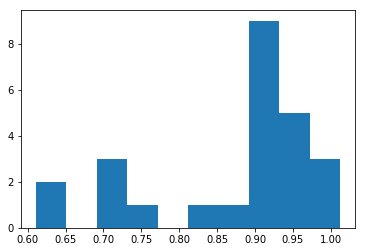

In [105]:
plt.hist(experiments.uerr_baseline(stan_data));plt.show()

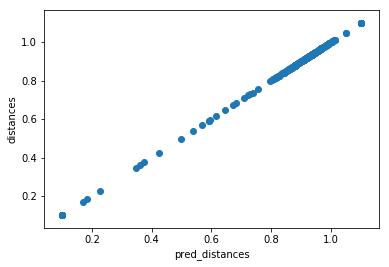

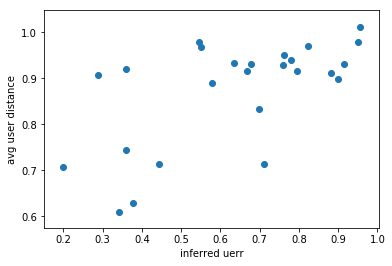

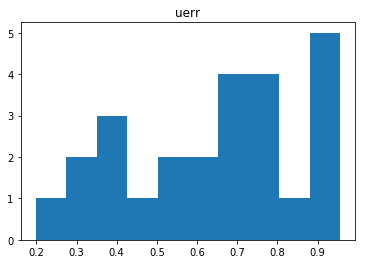

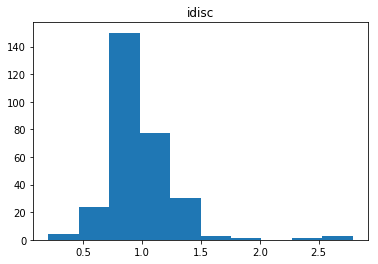

In [106]:
plt.scatter(opt["pred_distances"], stan_data["distances"])
plt.xlabel("pred_distances")
plt.ylabel("distances")
plt.show()
uerr_b = experiments.uerr_baseline(stan_data)
plt.scatter(opt["uerr"], uerr_b)
plt.xlabel("inferred uerr")
plt.ylabel("avg user distance")
plt.show()
plt.title("uerr")
plt.hist(opt["uerr"])
plt.show()
plt.title("idisc")
plt.hist(opt["disc"])
plt.show()

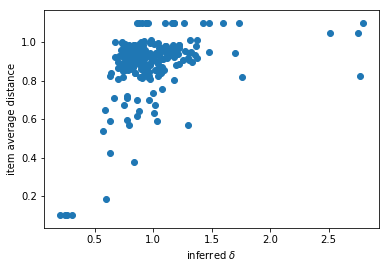

In [107]:
sddf = pd.DataFrame(stan_data)
diff_b = sddf.groupby("items").mean()["distances"].to_dict()
diff_m = dict([(i+1, v) for i, v in enumerate(opt["disc"]) if i+1 in diff_b.keys()])
plt.scatter(diff_m.values(), diff_b.values())
plt.xlabel("inferred $\delta$")
plt.ylabel("item average distance")
# plt.title("Item Diagnostic")
plt.show()

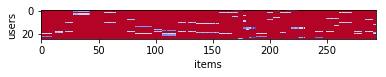

In [108]:
per_item_user_rankings = experiments.get_model_user_rankings(opt, debug=True)

In [109]:
# per_item_user_rankings = experiments.get_model_user_rankings({"dist_from_truth":samples["dist_from_truth"].mean(axis=0)}, debug=True)

In [110]:
random = experiments.get_baseline_random(crowd_df, "label", "itemID")
faveu = experiments.get_baseline_global_best_user(stan_data, crowd_df, "label", "itemID", "worker")
center = experiments.get_baseline_item_centrallest(stan_data, crowd_df, "label", "itemID", "worker")
model4 = experiments.get_preds(crowd_df, per_item_user_rankings, "label", "itemID", "worker")

In [111]:
oracle = experiments.get_oracle_preds(stan_data, crowd_df, "label", "itemID", "worker", bleu_multi, golddict)


In [112]:

_ = experiments.eval_preds_vs(random, faveu, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, center, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, model4, golddict, bleu_multi)
_ = experiments.eval_preds_vs(random, oracle, golddict, bleu_multi)

0.2566217578306344 0.2561061729416958
t-test Ttest_relResult(statistic=0.08329212451153509, pvalue=0.9336763324939175)
z-score -0.004874302902616506
baseline below thresh 0.0
model below thresh 0.0
0.2566217578306344 0.25357351733726
t-test Ttest_relResult(statistic=0.6092005889370582, pvalue=0.5428651744191519)
z-score -0.03565076790087583
baseline below thresh 0.0
model below thresh 0.0
0.2566217578306344 0.24848892054515187
t-test Ttest_relResult(statistic=1.3942227826590745, pvalue=0.16431028101144005)
z-score -0.08159071696469976
baseline below thresh 0.0
model below thresh 0.0
0.2566217578306344 0.30153356960252514
t-test Ttest_relResult(statistic=-9.351836661575094, pvalue=2.3493479375614263e-18)
z-score 0.5472748456307903
baseline below thresh 0.0
model below thresh 0.0


In [302]:
dist_fn = lambda x,y: 1 - gleu2way(x,y) 
urdu_experiment = experiments.RealExperiment(gleu_multi, "label", "itemID", "worker", distance_fn=dist_fn)
urdu_experiment.annodf = crowd_df.copy()
urdu_experiment.golddict = golddict
# urdu_experiment.produce_stan_data()

In [303]:
urdu_experiment.set_supervised_labels(20, apply_fn=lambda x:x[0])

100%|██████████| 293/293 [00:00<00:00, 502.33it/s]


In [304]:
# plt.scatter(experiments.uerr_baseline(stan_data), experiments.uerr_baseline(urdu_experiment.stan_data))
# plt.show()

In [305]:
urdu_experiment.train(iter=1500)

Pickled model loaded
sigma 0.00027021254808893826


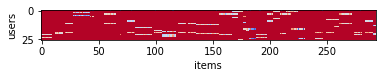

BEST AVAILABLE USER
0.19203155370670263 0.21216160493807756
t-test Ttest_relResult(statistic=-5.769297386117022, pvalue=9.837316798501037e-09)
z-score 0.15621248483232783
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.19203155370670263 0.2029598240554734
t-test Ttest_relResult(statistic=-3.227274104305298, pvalue=0.0012794542790826992)
z-score 0.08738334554944191
baseline below thresh 0.0
model below thresh 0.0
MULTIDIMENSIONAL ANNOTATION SCALING
0.19203155370670263 0.22217840206461695
t-test Ttest_relResult(statistic=-9.086264766102023, pvalue=3.507771177211446e-19)
z-score 0.24602441198000619
baseline below thresh 0.0
model below thresh 0.0
ORACLE
0.19203155370670263 0.2505760831231898
t-test Ttest_relResult(statistic=-18.903786434355496, pvalue=5.684743553901851e-71)
z-score 0.5118487146730045
baseline below thresh 0.0
model below thresh 0.0


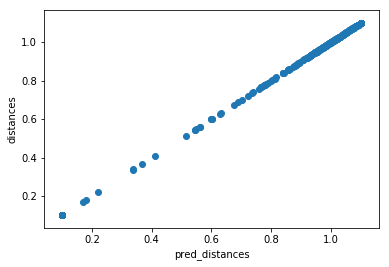

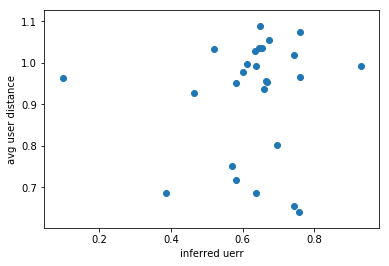

In [306]:
urdu_experiment.test(debug=True)

item 1
    u1s  u2s  distances
50    1   22   1.000000
51    1   24   1.044444
52   22   24   0.988889
item 61
   u1s  u2s  distances
3    1    4   0.922034
4    1   12   1.006780
5    4   12   0.783673
item 80
    u1s  u2s  distances
53    1   10   0.777419
54    1   20   1.072727
55   10   20   1.072727
item 101
    u1s  u2s  distances
29    1   18   0.771429
30    1   20   1.063636
31   18   20   1.063636
item 107
     u1s  u2s  distances
286   19   22   0.933333
287   19   23   0.100000
288   22   23   0.933333


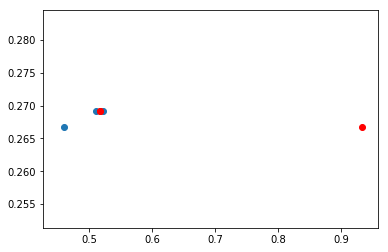

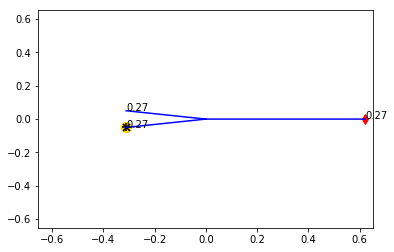

item 108
     u1s  u2s  distances
262   19   22   0.757895
263   19   23   0.338095
264   22   23   0.790476


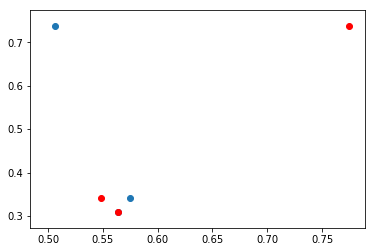

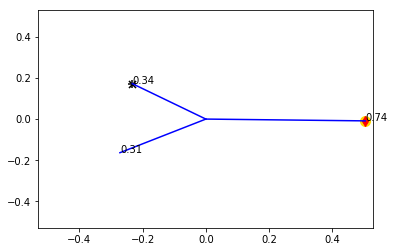

item 109
     u1s  u2s  distances
265   19   22   1.008163
266   19   23   0.100000
267   22   23   1.008163


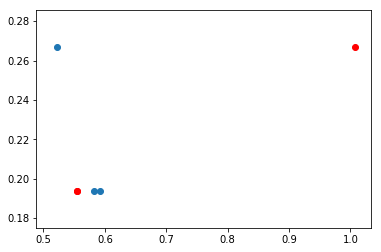

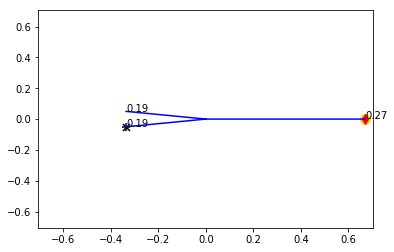

item 111
     u1s  u2s  distances
274   19   22   0.894118
275   19   23   0.100000
276   22   23   0.894118


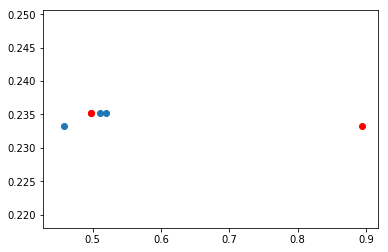

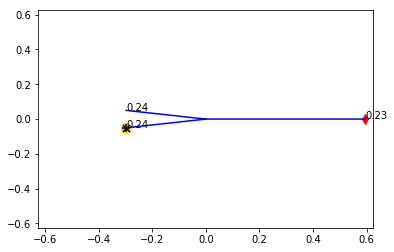

item 112
     u1s  u2s  distances
280   19   22   0.951351
281   19   23   0.689744
282   22   23   1.023077


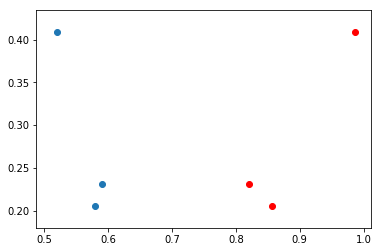

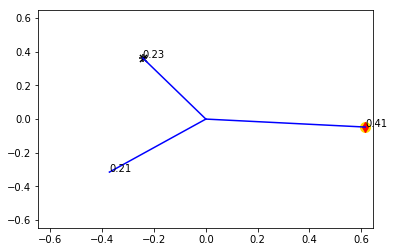

item 113
     u1s  u2s  distances
277   19   22   0.991304
278   19   23   0.339130
279   22   23   0.991304


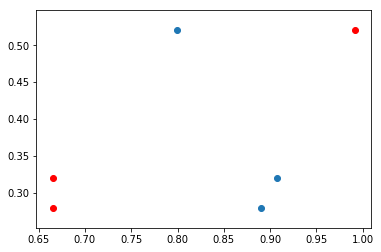

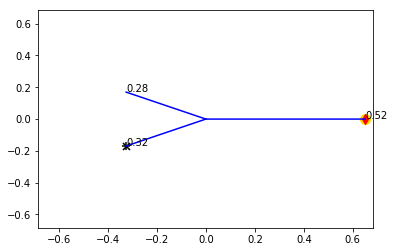

item 114
     u1s  u2s  distances
259   19   22   1.023077
260   19   23   0.600000
261   22   23   1.061538


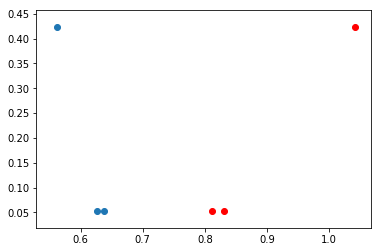

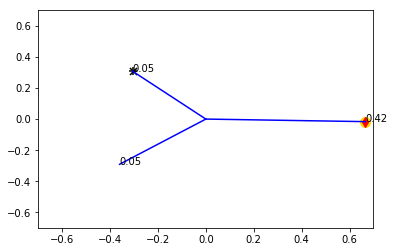

item 115
     u1s  u2s  distances
268   19   22   0.947826
269   19   23   0.170423
270   22   23   0.952113


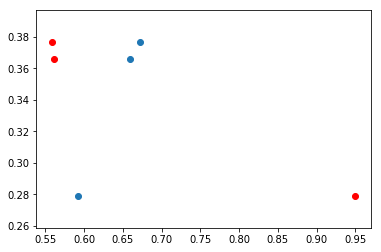

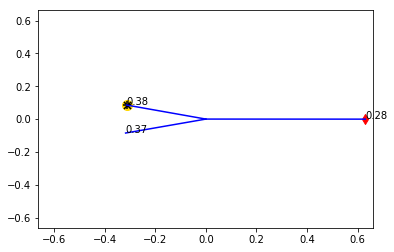

item 116
    u1s  u2s  distances
41    1   19   0.962745
42    1   22   0.854902
43    1   23   0.962745
44   19   22   0.933333
45   19   23   0.221951
46   22   23   0.941463
item 117
     u1s  u2s  distances
283   19   22   0.882051
284   19   23   0.100000
285   22   23   0.882051


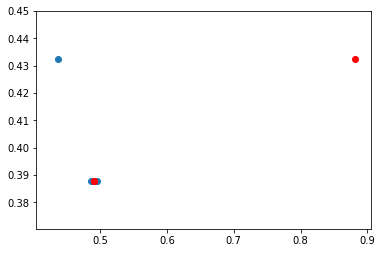

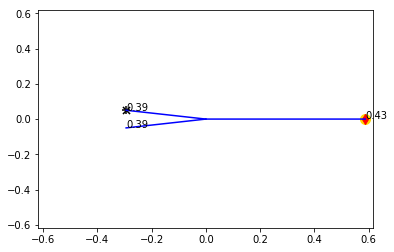

item 118
     u1s  u2s  distances
271   19   22   1.066667
272   19   23   0.600000
273   22   23   1.066667


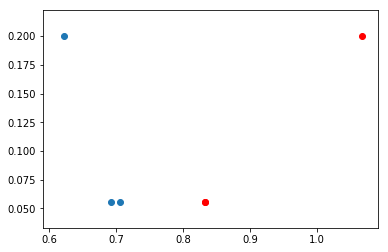

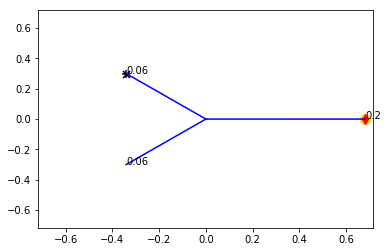

item 154
   u1s  u2s  distances
7    1   13   0.858621
8    1   21   0.910345
9   13   21   0.962069
item 168
    u1s  u2s  distances
88    2    4   0.875862
89    2    7   0.859259
90    4    7   0.548276


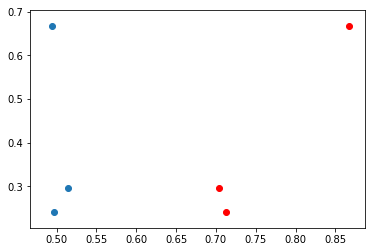

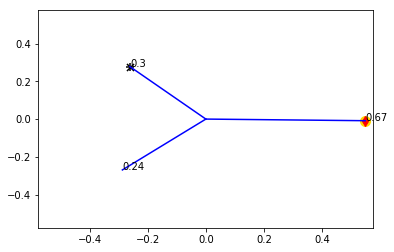

item 169
    u1s  u2s  distances
85    2    4        1.0
86    2    7        1.0
87    4    7        0.8


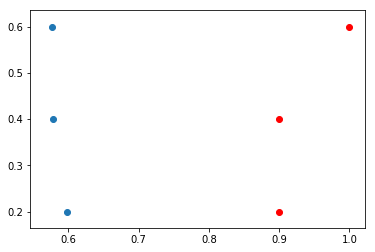

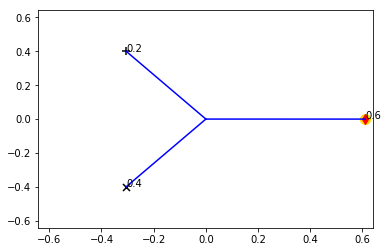

item 170
    u1s  u2s  distances
82    2    4        1.1
83    2    7        1.1
84    4    7        1.1


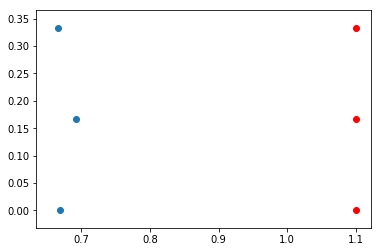

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


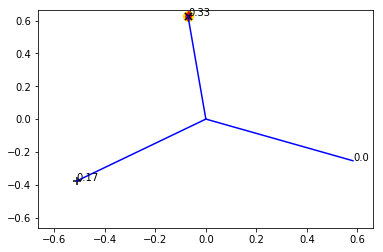

item 171
    u1s  u2s  distances
76    2    4   1.025287
77    2    7   0.982883
78    4    7   0.996396


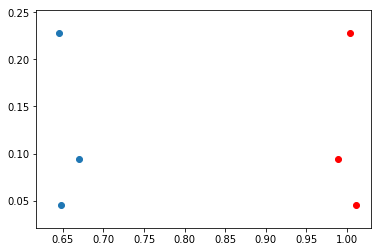

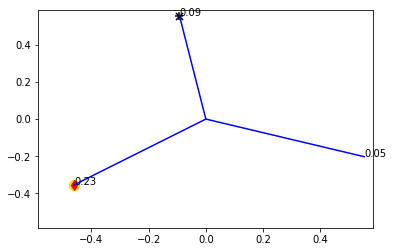

item 172
    u1s  u2s  distances
79    2    4   1.039024
80    2    7   0.995349
81    4    7   0.995349


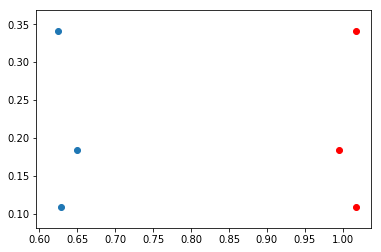

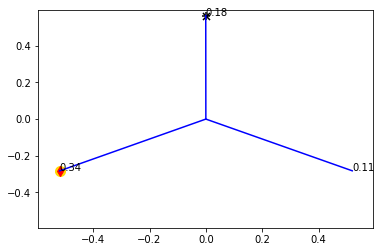

item 178
     u1s  u2s  distances
148    6   11   1.035294
149    6   17   0.985542
150   11   17   0.776471


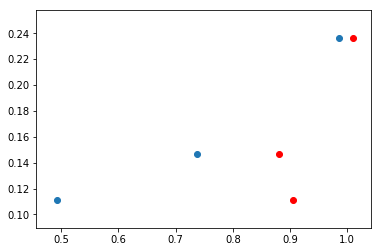

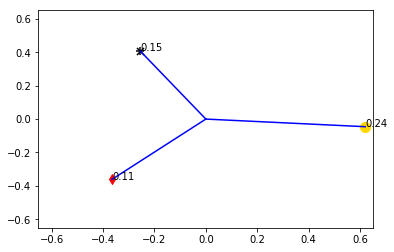

item 179
     u1s  u2s  distances
145    6   11   1.052991
146    6   17   1.036842
147   11   17   0.839316


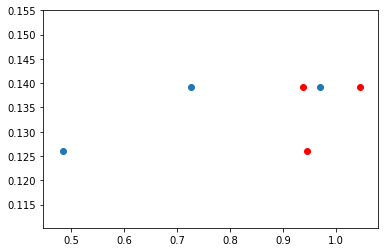

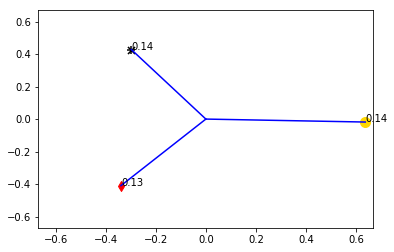

item 181
    u1s  u2s  distances
26    1   17   1.000000
27    1   18   0.933333
28   17   18   0.840741
item 184
    u1s  u2s  distances
13    1   17   1.100000
14    1   25   0.811111
15   17   25   1.100000
item 192
    u1s  u2s  distances
22    1   22   0.856757
23    1   24   0.977778
24   22   24   0.977778
item 202
   u1s  u2s  distances
0    1    4   1.044444
1    1   10   0.803704
2    4   10   1.062963
item 211
    u1s  u2s  distances
16    1    4   1.040000
17    1   21   1.020000
18    4   21   1.047368
item 216
    u1s  u2s  distances
47    1    2   1.047368
48    1    4   1.066667
49    2    4   1.073684
item 220
    u1s  u2s  distances
19    1    2   0.854386
20    1   17   0.977193
21    2   17   0.915789
item 221
    u1s  u2s  distances
32    1    2   0.991892
33    1   17   1.053488
34    2   17   1.076744
item 247
    u1s  u2s  distances
38    1   20   1.067213
39    1   25   0.918182
40   20   25   1.054545
item 270
    u1s  u2s  distances
35    1    4   1.052830
36

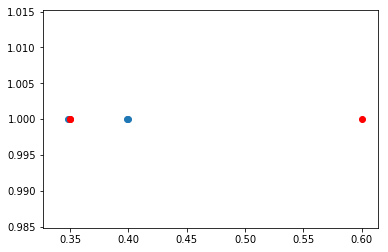

/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


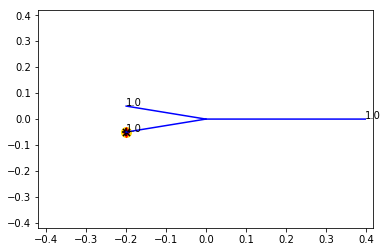

item 292
     u1s  u2s  distances
219   14   21   0.964407
220   14   22   0.890909
221   21   22   0.998305


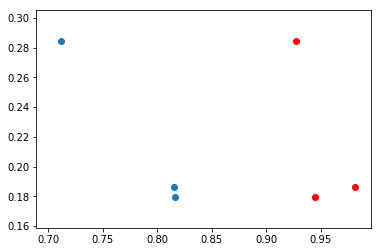

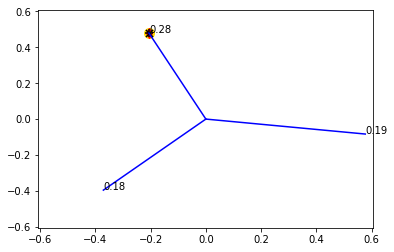

item 293
     u1s  u2s  distances
216   14   21   0.933333
217   14   22   0.817391
218   21   22   0.973016


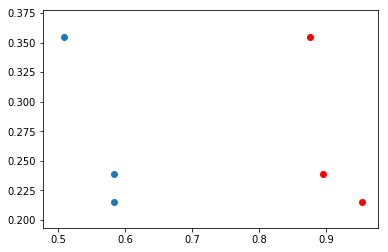

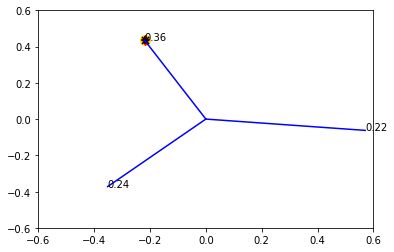

/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


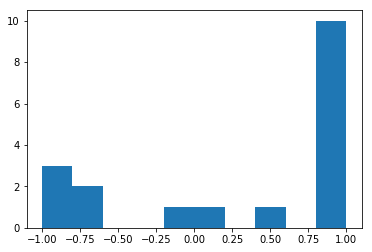

sad nan


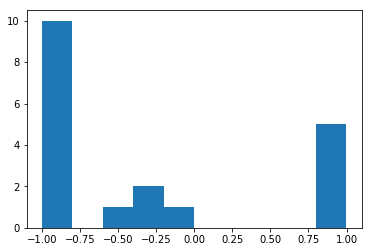

map nan


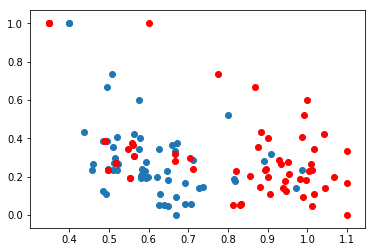


 ALL
sad -0.4242250532235784
map -0.4535042759321277


In [307]:
urdu_experiment.debug(plot_vs_gold=True)

In [39]:
utils.visualize_embeddings(stan_data, opt)

AttributeError: module 'utils' has no attribute 'visualize_embeddings'

gold eval : BLEU score

In [390]:
crowd_df[crowd_df["label"].isin(model4.values())]

,item,itemID,label,worker,doc,seg,status,hit
140,مخلوط تعلیم پر پابندی: طالبان,0,Ban on coeducation: Taliban,20,BBC_URD_20090104.0004,1,Approved,XZDRNTZP2W7Y0NZBVWA0
149,زخمی کو بنوں سول ہسپتال میں داخل کردیاگیا ہے۔,1,Injured has been admitted in Civil Hospital.,20,BBC_URD_20090104.0004,10,Approved,XZDRNTZP2W7Y0NZBVWA0
141,شمالی وزیرستان کے صدر مقام میران شاہ اور دوسری تحصیلوں میں حافظ گل بہادر گروپ کے مقامی طالبان نے ایک پمفلٹ تقسیم کیا ہے جس میں سرکاری اور نیم سرکاری ان تعلیمی اداروں کو دھمکی دی گئی ہے جن میں لڑکوں اور لڑکیوں کو مخلوط تعلیم دی جارہی ہے۔,2,Local Talibans of Gul Bahadur group have distributed a pamphlet in Miran Shah (Capital of Southern Waziristan) and in other Tehsils in which government and semi government coeducational institutes have been threatened.,20,BBC_URD_20090104.0004,2,Approved,XZDRNTZP2W7Y0NZBVWA0
142,پمفلٹ میں کہاگیا ہے کہ اگر پانچ جنوری تک مخلوط تعلیمی اداروں کو بند نہیں کیاگیا تو ان کے خلاف کارروائی شروع کردی جائے گی۔,3,"Pamphlet included that if coeducation institutes are not closed till 5th of January, action will be taken against them.",20,BBC_URD_20090104.0004,3,Approved,XZDRNTZP2W7Y0NZBVWA0
143,پمفلٹ میں کہاگیا ہے کہ سرکاری امداد اور دیگر تعلیمی امور کے لیے خواتین کے شناختی کارڈ بنوانے پر پابندی ہوگی اور خواتین کو تمام تحصیلوں میں نادرا کے دفاتر پر جانے سے بھی منع کردیا ہے۔,4,Pamphlet said that women are banned to have ID Cards for government aid and for educational purposes and women are prohibited to go to NADRA's Offices in all Tehsils.,20,BBC_URD_20090104.0004,4,Approved,XZDRNTZP2W7Y0NZBVWA0
144,مقامی طالبان کی جانب سے خواتین کے شناختی کارڈ بنوانے پر پابندی کا اعلان ایک ایسے موقع پر کیاگیا ہے جب شمالی وزیرستان میں بے نظیرانکم سپورٹ پروگرام کے لیے نادرہ کے دفاتر میں تقریباً دو سو خواتین نے شناختی کارڈ بنوانے کے لیے فارم جمع کیے ہیں۔,5,The announcement on the ban of women ID Card has been made at the time when almost 200 women have submitted forms in NADRA Offices in Southern Waziristan for Benazir Income Support Program.,20,BBC_URD_20090104.0004,5,Approved,XZDRNTZP2W7Y0NZBVWA0
145,مقامی لوگوں کے مطابق طالبان کی جانب سے جاری ہونے والے پمفلٹ کو شمالی وزیرستان کے تمام مساجد کے لاؤڈسپیکر پر پڑھ کر سنایا گیا,6,According to local people the pamphlet issued by Taliban was announced on the loudspeakers of all the Masjids.,20,BBC_URD_20090104.0004,6,Approved,XZDRNTZP2W7Y0NZBVWA0
146,تاہم خط میں اس بات کا ذکر نہیں کیاگیا ہے کہ لڑکیوں کی الگ تعلیمی ادارے پر بھی پابندی ہوگی یا نہیں۔,7,However it was not mentioned in the letter that separate educational institute for woman are banned or not.,20,BBC_URD_20090104.0004,7,Approved,XZDRNTZP2W7Y0NZBVWA0
147,پمفلٹ کے مطابق اس اعلان کے بعد تعلیم حاصل کرنے کے لیے یا شناختی کارڈ بنانے کے لیے کوئی بھی عورت سکول یا نادرا کی آفس گئی تو پکڑنے جانے کی صورت میں اس عورت اور اس کے اہل خانہ کو شرعی سزا دی جائے گی۔,8,According to Pamphlet after this announcement any woman caught in the school for getting education or in NADRA's Office for having ID Card will be punished religiously along with her family.,20,BBC_URD_20090104.0004,8,Approved,XZDRNTZP2W7Y0NZBVWA0
148,اس کے علاوہ ضلع بنوں میں پولیس کا کہنا ہے کہ اتوار کو بنوں میرانشاہ روڈ پر ایک بارودی سرنگ کا دھماکہ ہوا ہے جس کے نتیجہ میں ایک راہ گیر ہلاک جبکہ ایک زخمی ہوگیا ہے۔,9,Moreover Police of District Bannu says on Sunday a landmine exploded on Miram Shah Bannu Road in result of that a traveler died and one is injured.,20,BBC_URD_20090104.0004,9,Approved,XZDRNTZP2W7Y0NZBVWA0


In [391]:
(crowd_df[crowd_df["label"].isin(random.values())].status=="Approved").mean()

0.5195195195195195

In [392]:
(crowd_df[crowd_df["label"].isin(model4.values())].status=="Approved").mean()

0.5709677419354838

Reason this is pretty mild:
Random basically imitates having one user label per item. The more redundancy you have the better you should expect to do versus random. In this experiment the amount of redundancy is minimal, so not THAT much better than random.

In [29]:
sddf = pd.DataFrame(stan_data)
sddf = sddf.rename(columns={"items":"itemID", "u1s":"worker1", "u2s":"worker2", "distances":"distance"})
sddf = sddf[["itemID","worker1","worker2","distance"]]
tmpdist = sddf[sddf.itemID>290]

In [28]:
tmp = crowd_df[["itemID", "worker", "label"]]
tmp2 = tmp[tmp.itemID>290]

In [33]:
tmpdist.groupby("itemID","wo")

,itemID,worker1,worker2,distance
280,291,20,13,0.703248
281,291,20,21,0.386507
282,291,13,21,0.386507
283,292,20,13,0.276478
284,292,20,21,0.250495
285,292,13,21,0.264749
286,293,21,20,0.231979
287,293,21,13,0.298633
288,293,20,13,0.268575


In [37]:
discol = "worker:"
tmpdist = sddf[sddf.itemID>290].rename(columns={"distance":discol})
def thing(tmpdist):
    s1 = tmpdist.groupby("worker1").sum()[discol]
    s2 = tmpdist.groupby("worker2").sum()[discol]
    n1 = tmpdist.groupby("worker1").count()[discol]
    n2 = tmpdist.groupby("worker2").count()[discol]
    return s1.add(s2, fill_value=0) / n1.add(n2, fill_value=0)
tmpdist.groupby("itemID").apply(thing)

worker:,13,20,21
itemID,,,
291,0.544878,0.544878,0.386507
292,0.270614,0.263487,0.257622
293,0.283604,0.250277,0.265306


In [51]:
tmpdist = sddf[sddf.itemID>290].rename(columns={"worker1":"worker:"})
discol = "distance"
s1 = tmpdist.groupby("worker:").sum()[discol]
s2 = tmpdist.groupby("worker2").sum()[discol]
n1 = tmpdist.groupby("worker:").count()[discol]
n2 = tmpdist.groupby("worker2").count()[discol]
tmpdf = s1.add(s2, fill_value=0) / n1.add(n2, fill_value=0)

discol = "worker:"
tmpdist = sddf[sddf.itemID>290].rename(columns={"distance":discol})
def thing(tmpdist):
    return tmpdf
tmpdist.groupby("itemID").apply(thing)

worker:,13,20,21
itemID,,,
291,0.366365,0.35288,0.303145
292,0.366365,0.35288,0.303145
293,0.366365,0.35288,0.303145


In [43]:
tmpdf.rename(index={"worker1":"1"})

worker1
13    0.366365
20    0.352880
21    0.303145
Name: distance, dtype: float64